### Load Required Libraries

In [1248]:
import uproot
import pandas
pandas.set_option('display.max_rows', None)
import argparse
import awkward as ak 
import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import numpy as np
from numpy import *
import mplhep as hep
from tqdm import trange
import random
import time 
import hist

### Open the minitree .root file and Examine the Output Arrays

In [1249]:
minitree = uproot.open('/depot/cms/top/he614/HLLHC-FW/Top-Quark-Spin-Correlations/MiniTreeOutput/minitree_TT_Dilept_200.root')

In [1250]:
#minitree['Step7'].keys()

In [1251]:
#minitree['Step8'].keys()

### Examine Misidentified Tau decay as emu

In [1252]:
minitree['Step7'].arrays(['alep_pdgid', 'gen_alep_pdgid'], library='pd')

,alep_pdgid,gen_alep_pdgid
0,-11.0,-11.0
1,-11.0,-11.0
2,-13.0,-13.0
3,-11.0,-11.0
4,-11.0,-11.0
5,-13.0,-13.0
6,-13.0,-13.0
7,-13.0,-13.0
8,-11.0,-11.0
9,-13.0,-13.0


In [1253]:
print(ak.where((minitree['Step7']['alep_pdgid'].array()==minitree['Step7']['gen_alep_pdgid'].array())==False))

(<Array [12, 27, 28, 30, ... 757, 788, 789, 802] type='77 * int64'>,)


In [1254]:
alep_bad = minitree['Step7']['alep_pdgid'].array()[ak.where((minitree['Step7']['alep_pdgid'].array()==minitree['Step7']['gen_alep_pdgid'].array())==False)]
list(alep_bad)

[-11.0,
 -13.0,
 -13.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -11.0,
 -11.0,
 -13.0,
 -11.0,
 -11.0,
 -13.0,
 -11.0,
 -13.0,
 -11.0,
 -13.0,
 -11.0,
 -11.0,
 -11.0,
 -13.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -13.0,
 -13.0,
 -13.0,
 -11.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -11.0,
 -11.0,
 -11.0,
 -13.0,
 -11.0,
 -13.0,
 -13.0,
 -13.0,
 -13.0,
 -11.0,
 -11.0,
 -13.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -13.0,
 -11.0,
 -11.0,
 -11.0,
 -13.0,
 -11.0,
 -11.0,
 -13.0,
 -13.0,
 -13.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -13.0,
 -13.0,
 -11.0]

In [1255]:
gen_alep_bad = minitree['Step7']['gen_alep_pdgid'].array()[ak.where((minitree['Step7']['alep_pdgid'].array()==minitree['Step7']['gen_alep_pdgid'].array())==False)]
list(gen_alep_bad)

[-15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -13.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -13.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0,
 -15.0]

In [1256]:
#minitree['Step7'].arrays(["selection_step", "lep_pt", "lep_nearest_pt", "bjet_nearest_pt"] , library="pd")

In [1257]:
#minitree['Step0'].arrays(filter_name="/gen_lep_(eta|phi|mass)_0/", library="pd")

In [1258]:
#minitree['Step7'].arrays(filter_name="/(|gen_)lep_(pt|eta|phi|mass)/", library="pd")

In [1259]:
#minitree['Step7'].arrays(filter_name="/(|gen_)lep(|_nearest)_(pt|eta|phi|mass)/", library="pd")

In [1260]:
#minitree['Step8'].arrays(filter_name="/(|gen_)lep_(pt|eta|phi|mass)/", library="pd")

In [1261]:
#len(minitree['Step7']['selection_step'].array())

In [1262]:
len(minitree['Step8']['tt_mass'].array())

742

In [1263]:
len(minitree['Step8']['gen_tt_mass'].array())

742

### Open the Histogram .root file

In [26]:
hist_out = uproot.open('/depot/cms/top/he614/HLLHC-FW/Top-Quark-Spin-Correlations/HistogramOutput/histogram_TT_Dilept_200.root')

In [27]:
names = hist_out.keys(filter_name="/rvg_/")
names_pure = [[] for n in range(len(names))]
for i in range(len(names)):
    names_pure[i] = names[i].strip('rvg_').strip(';1')

In [1266]:
#names_pure

### Response Matrices

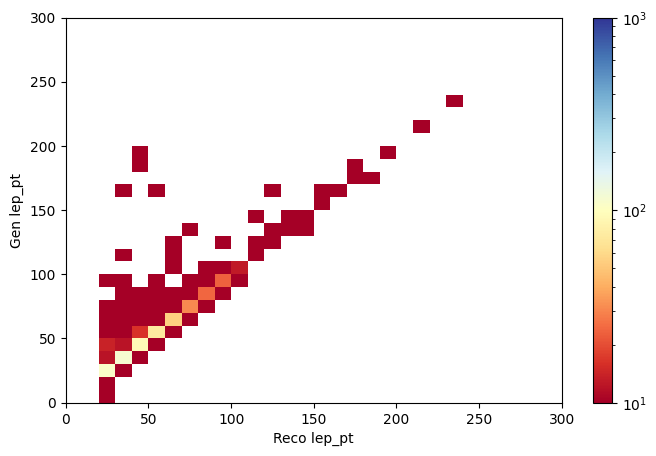

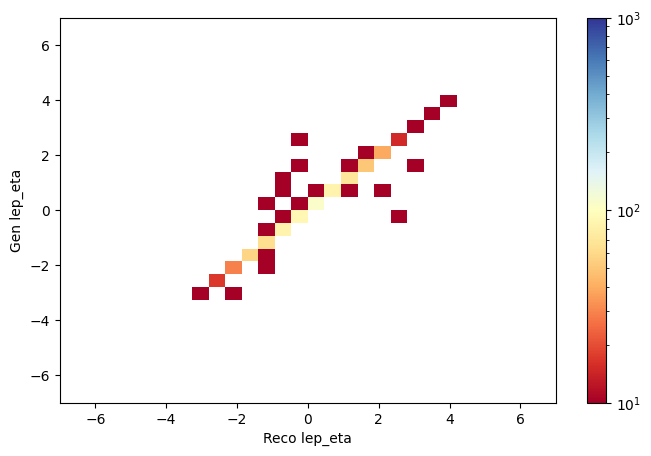

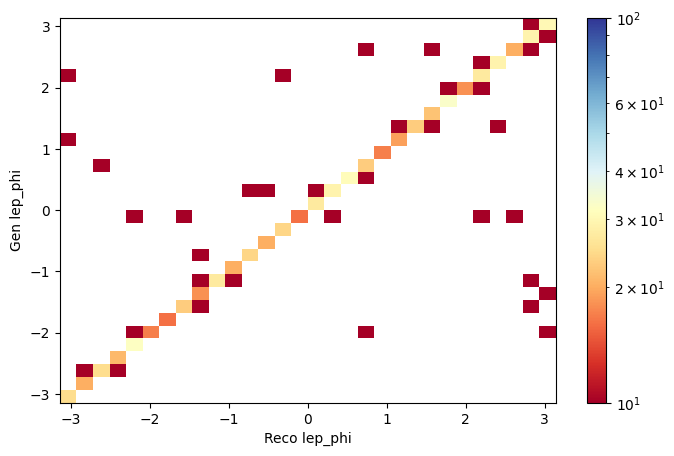

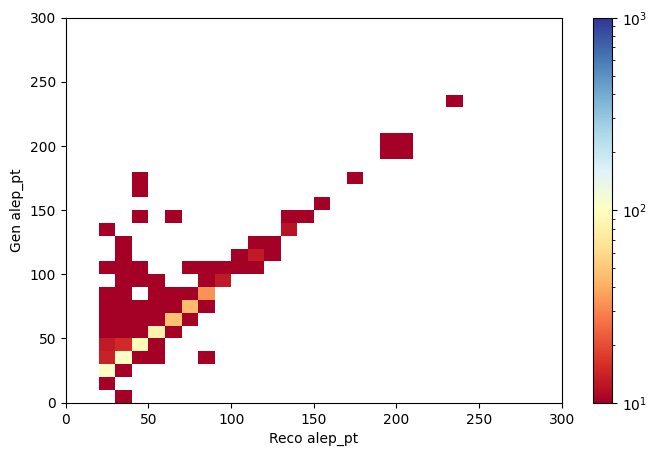

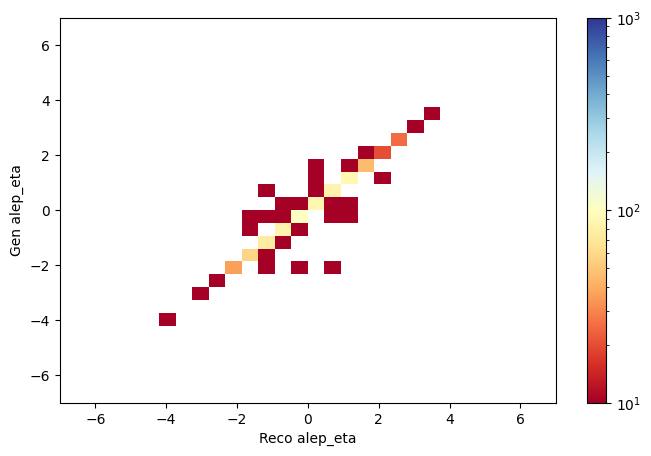

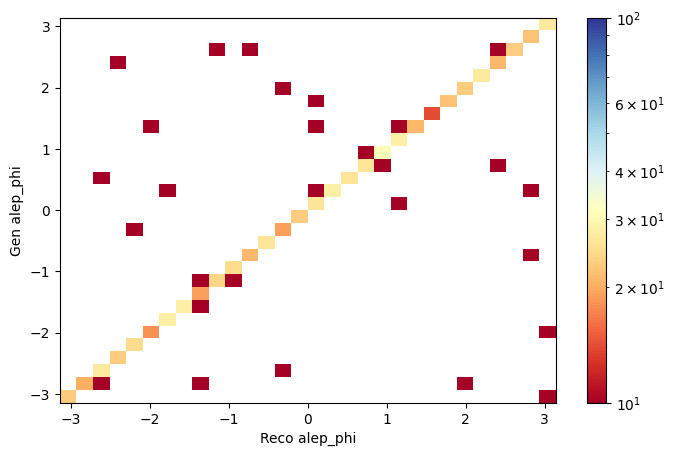

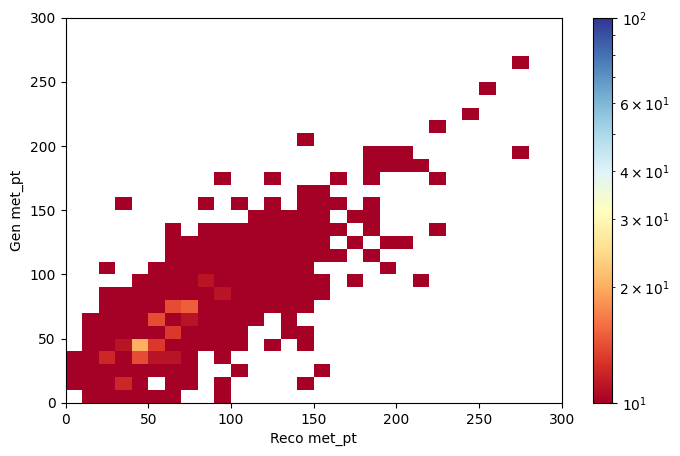

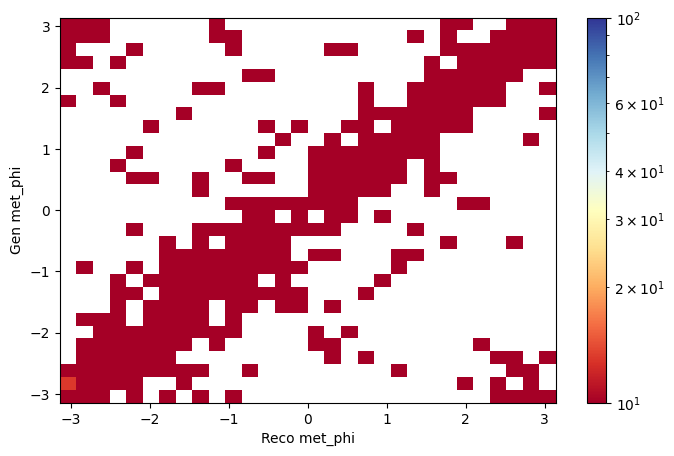

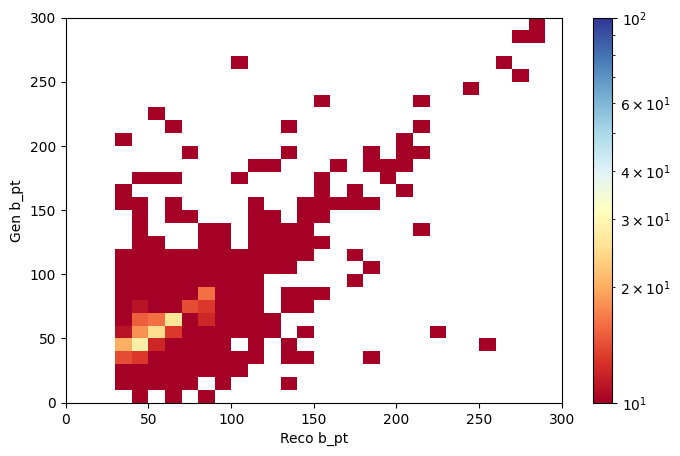

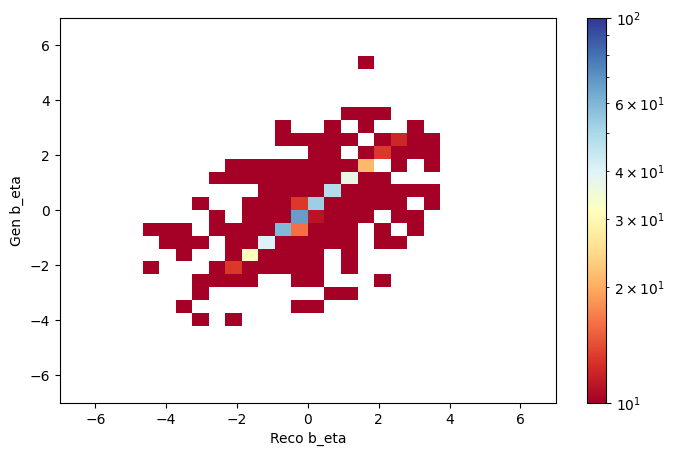

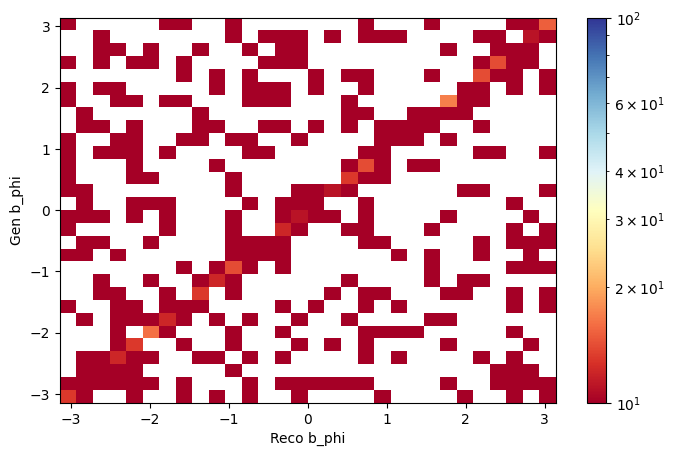

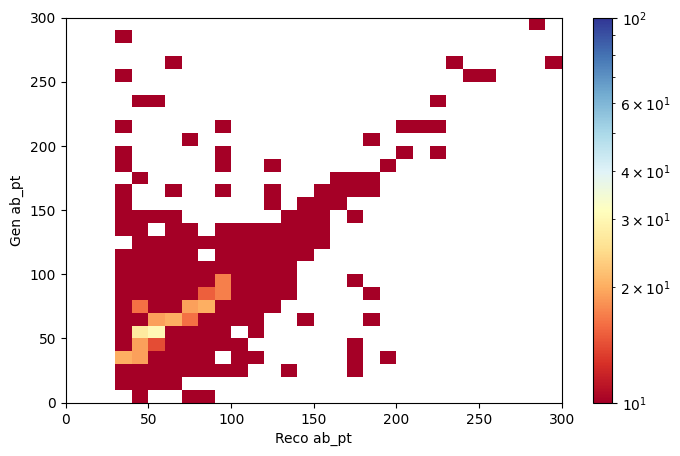

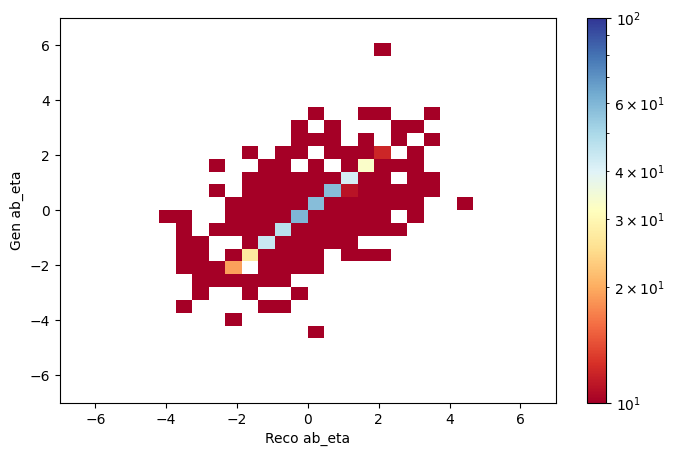

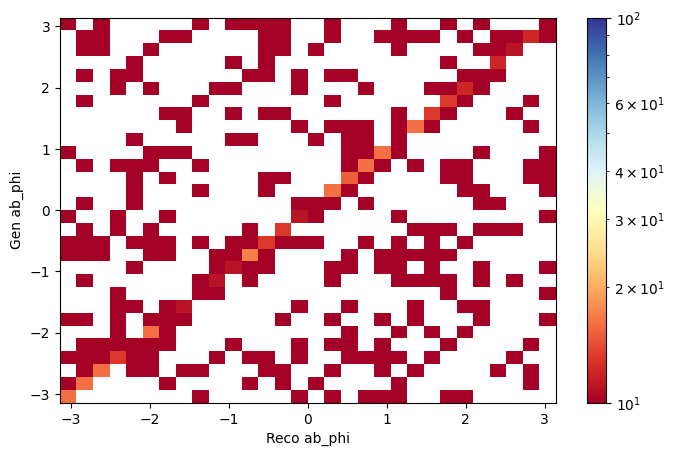

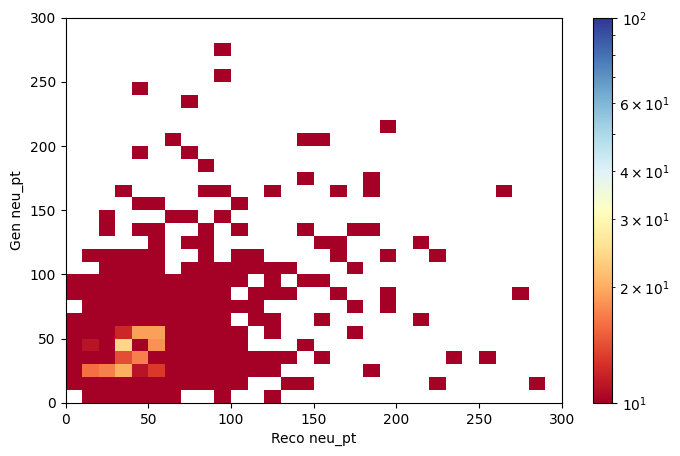

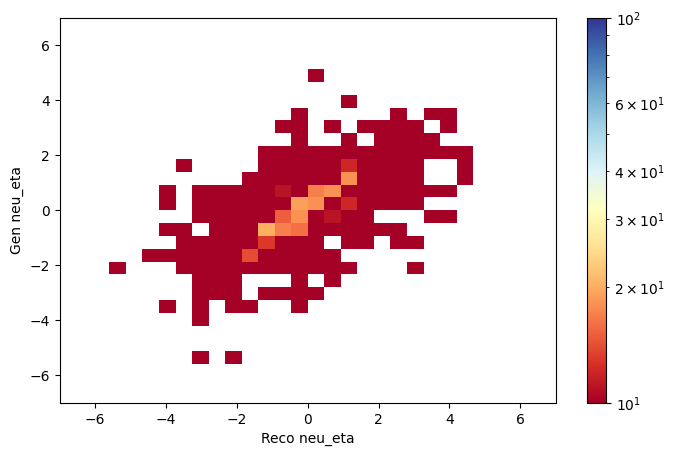

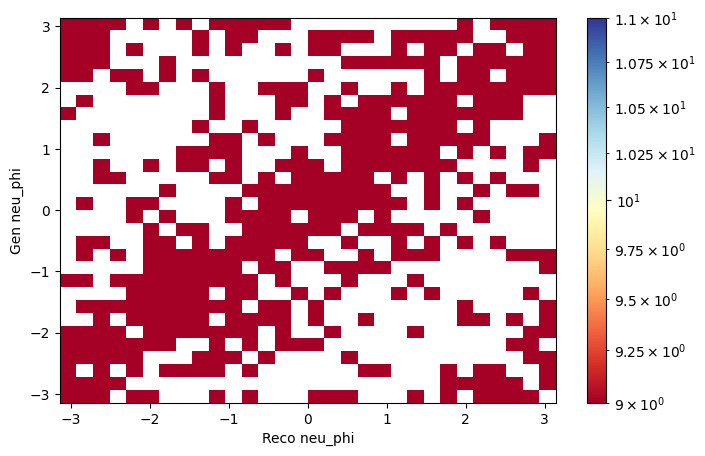

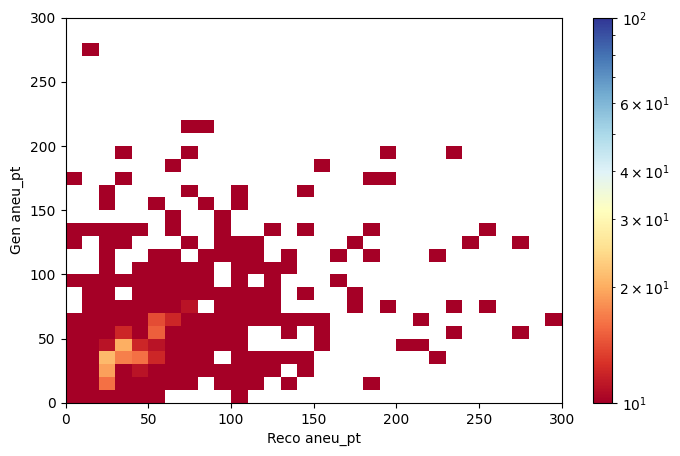

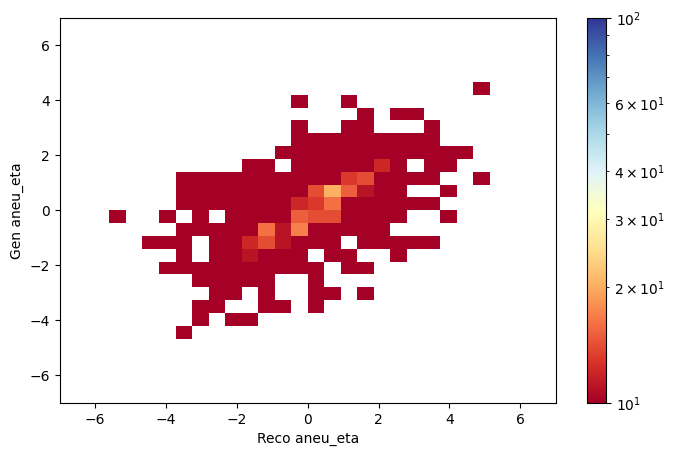

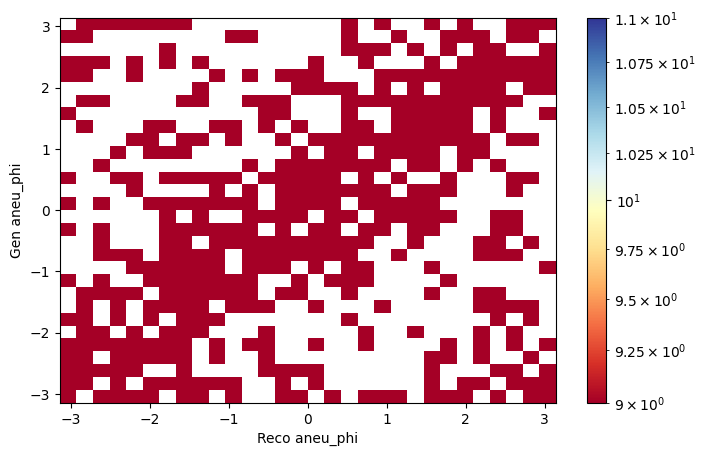

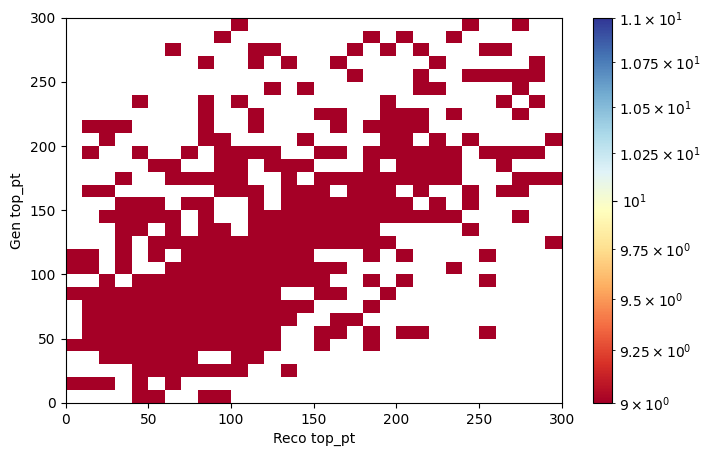

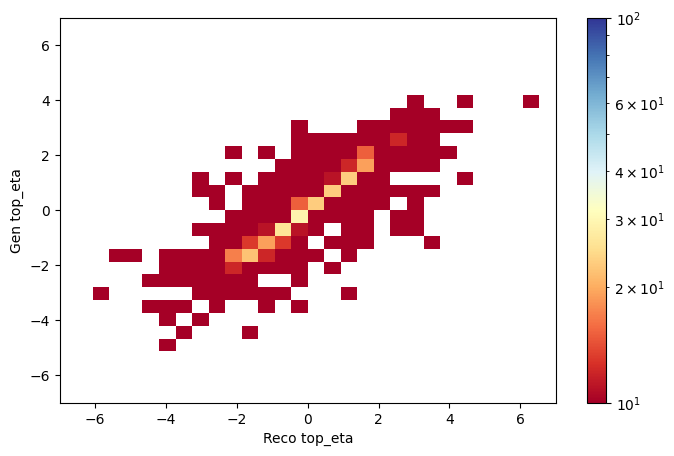

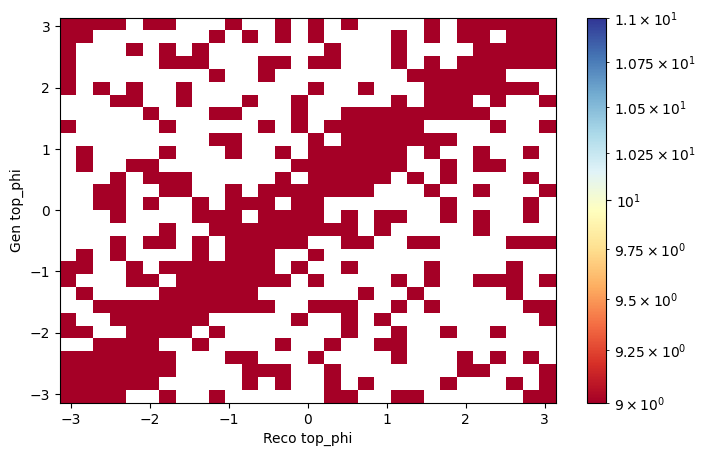

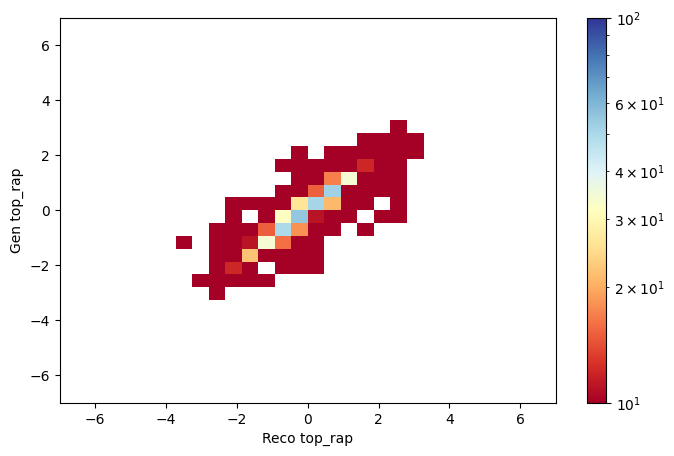

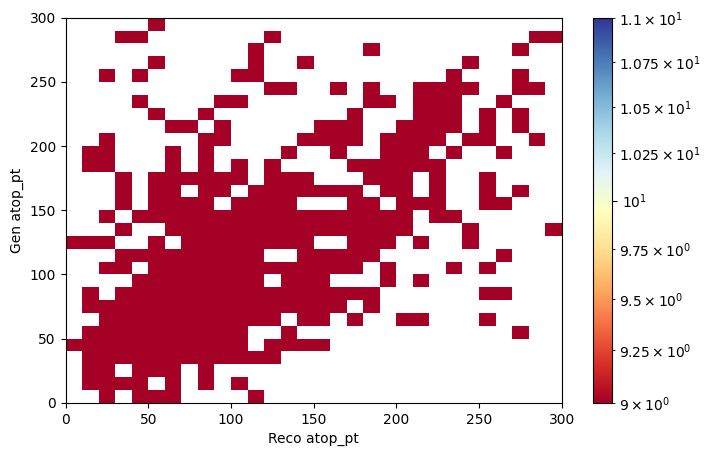

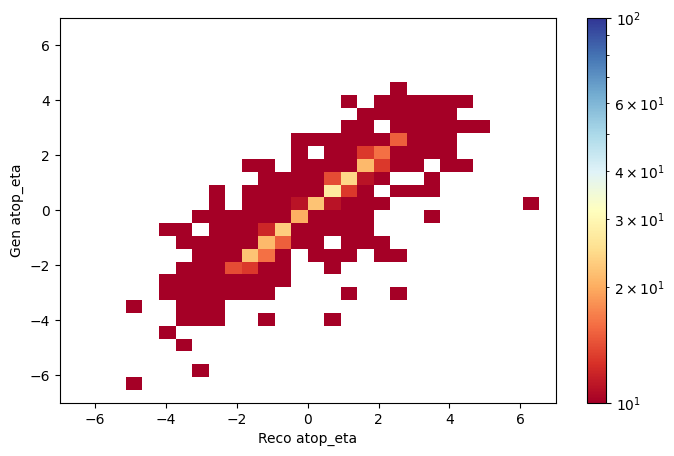

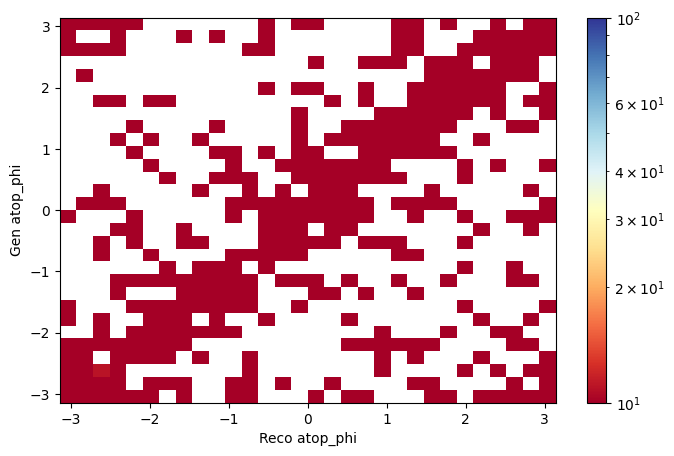

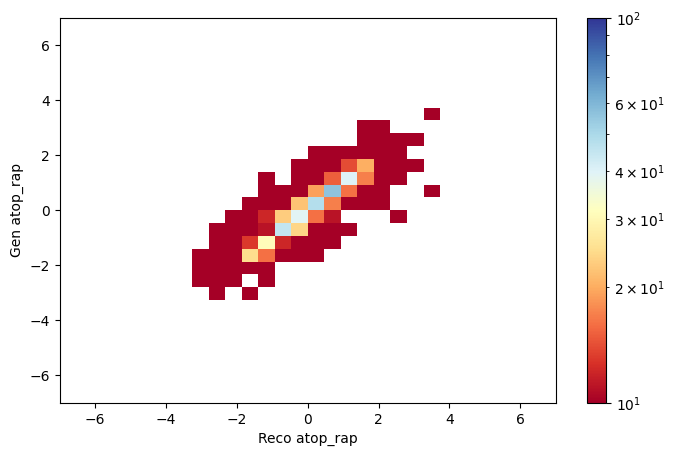

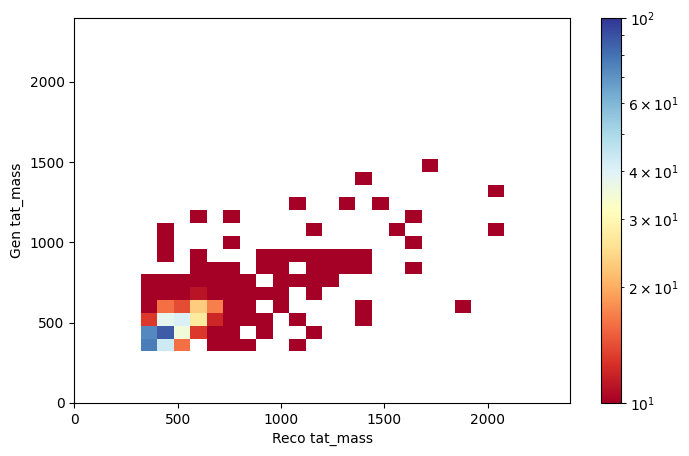

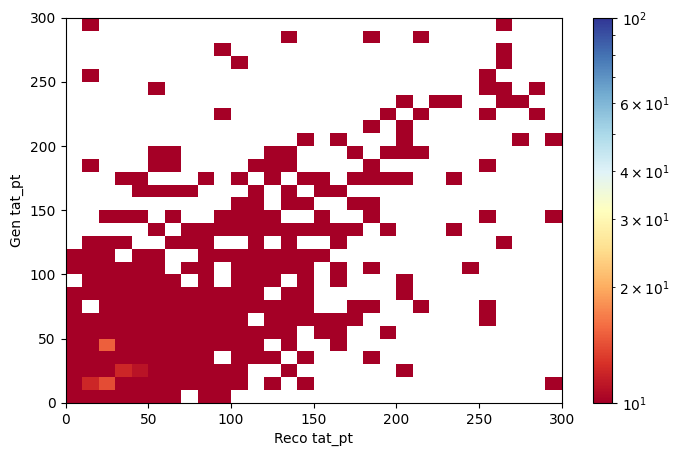

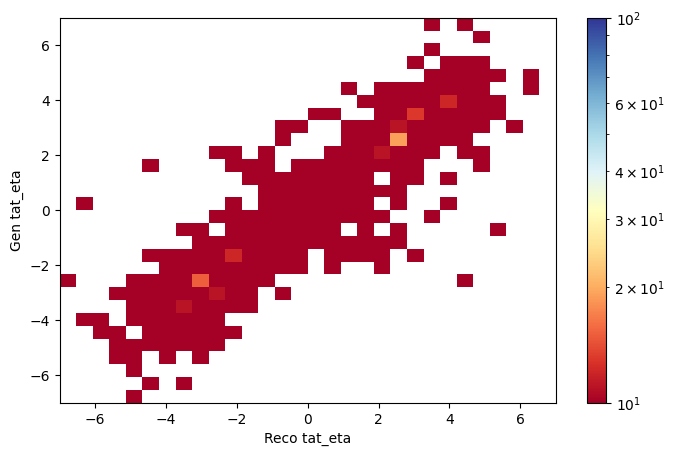

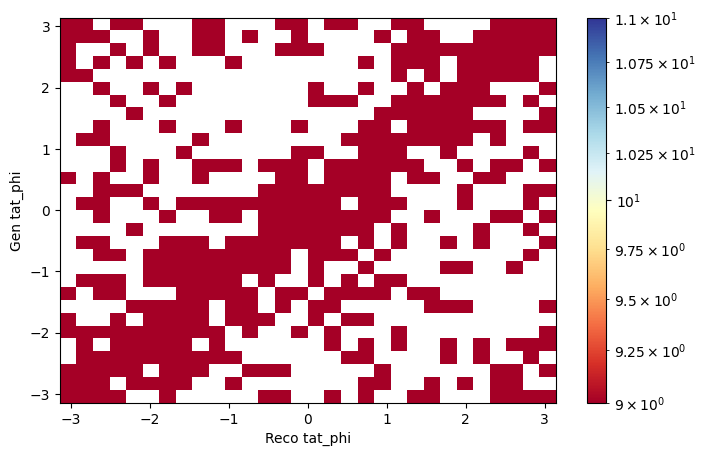

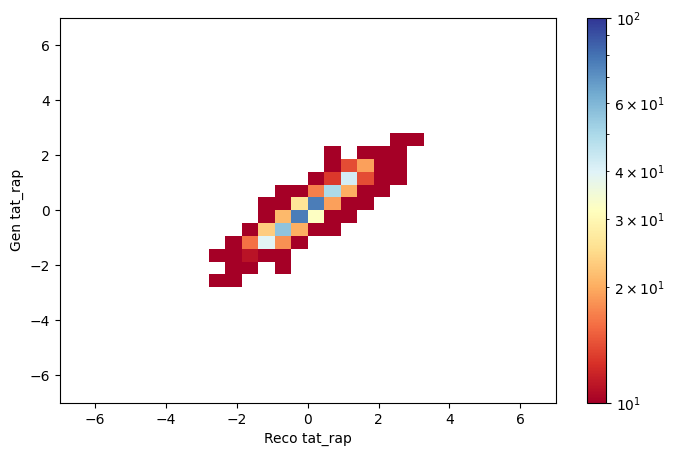

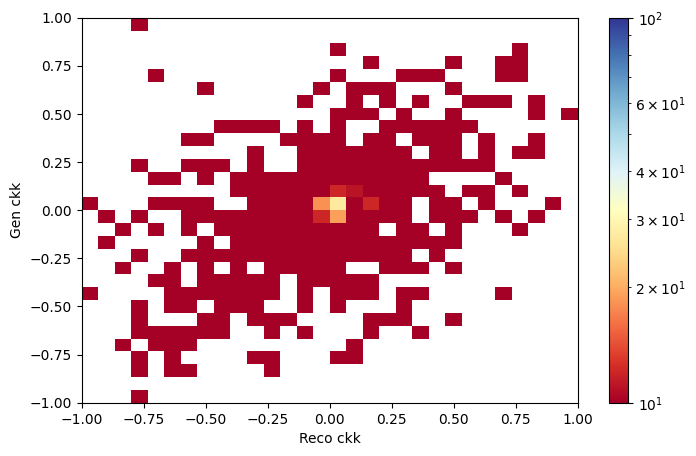

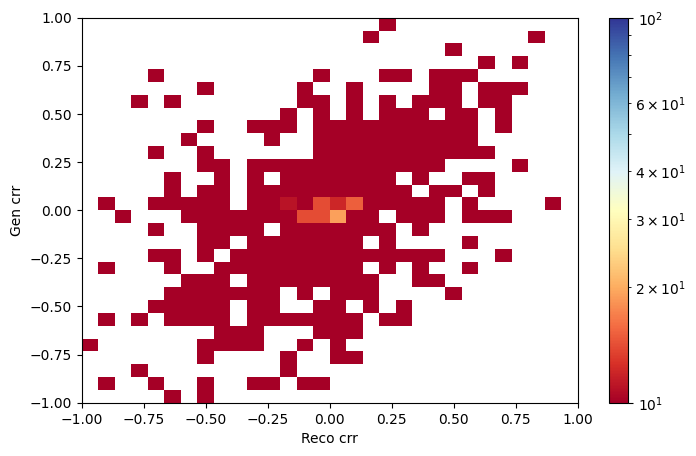

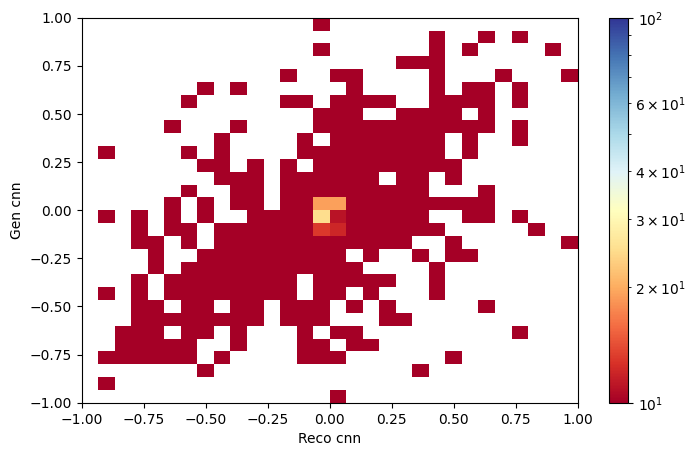

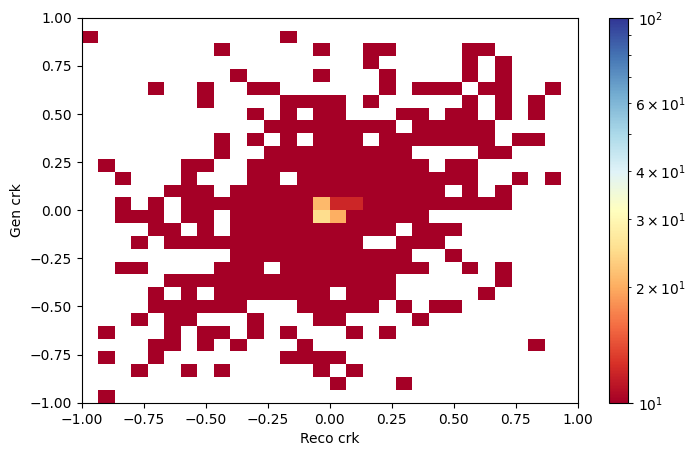

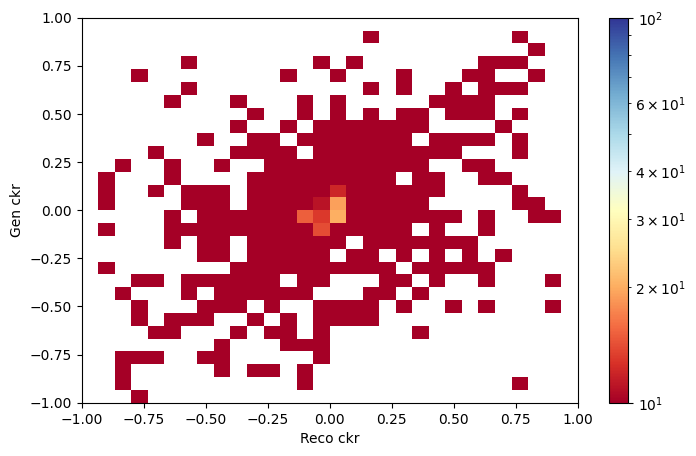

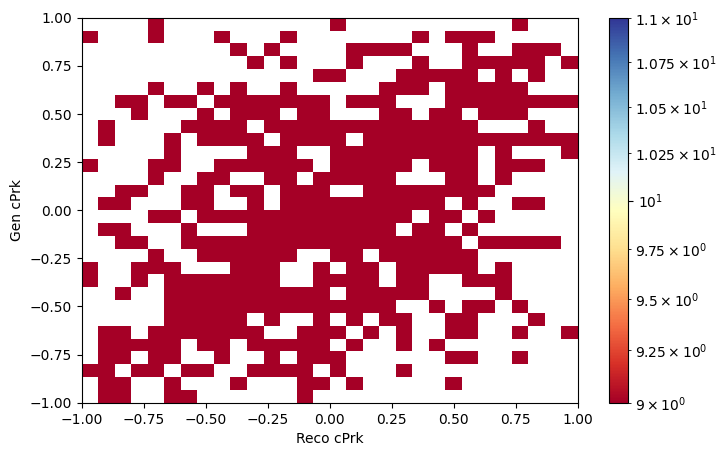

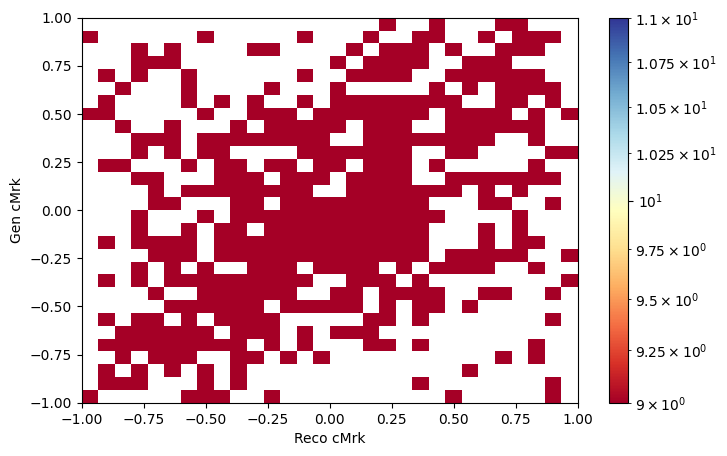

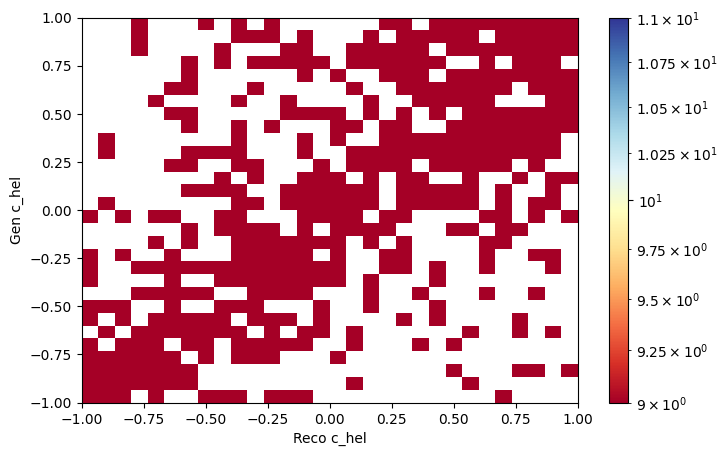

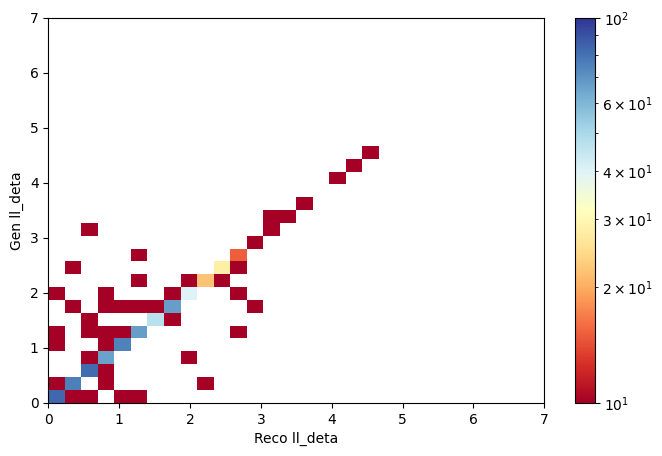

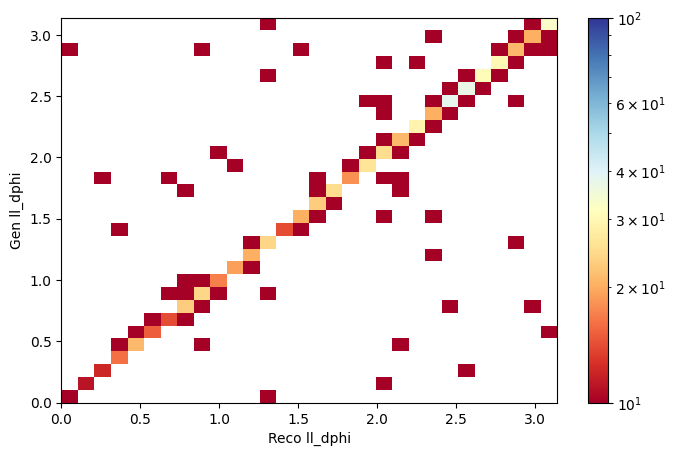

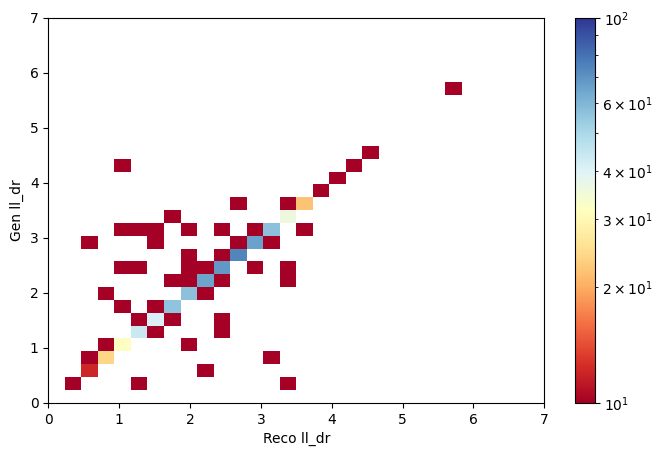

In [1267]:
for i in range(len(names)):
    h = hist_out[names[i]].to_hist()
    fig_rvg, ax_rvg = plt.subplots(figsize=(8, 5))
    w_rvg, x_rvg, y_rvg = h.to_numpy()
    levels = np.logspace(len(str(round(w_rvg.min()))), len(str(round(w_rvg.max()))))
    mesh_rvg = ax_rvg.pcolormesh(x_rvg, y_rvg, w_rvg.T, cmap="RdYlBu", norm=colors.LogNorm(vmin=levels.min(), vmax=levels.max()))
    ax_rvg.set_xlabel("Reco "+names_pure[i])
    ax_rvg.set_ylabel("Gen "+names_pure[i])
    
    fig_rvg.colorbar(mesh_rvg)
    plt.show()

### Alternative Contour Option

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f24833ace80>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f24805f1460>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f24808acbb0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

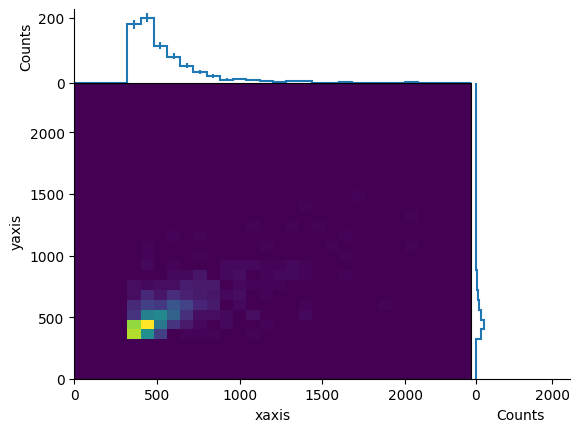

In [1268]:
hist_out['rvg_tat_mass'].to_hist().plot2d_full()

### Acceptance $\times$ Effeciency with the Make_minitree_v2.py
Please check the equivalenteff_cut.cc to generate these. 

In [1269]:
h1 = hist_out['lep_pt'].to_hist()

In [1270]:
h2 = hist_out['all_gen_lep_pt'].to_hist()

In [1271]:
h1

Hist(Regular(30, 0, 300, name='xaxis'), storage=Double()) # Sum: 741.0 (742.0 with flow)

In [1272]:
h2

Hist(Regular(30, 0, 300, name='xaxis'), storage=Double()) # Sum: 9343.0 (10192.0 with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f24802ba7f0>, errorbar=None, legend_artist=None)]

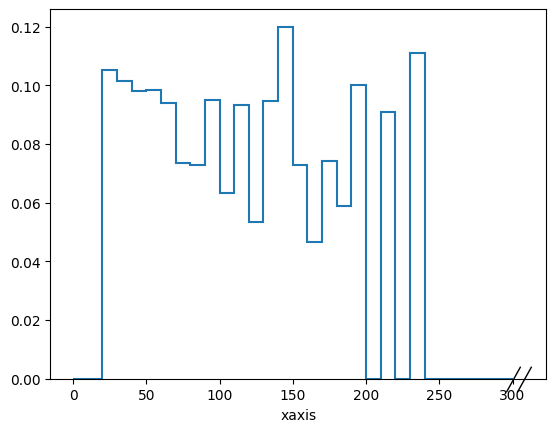

In [1273]:
(h1/h2).plot()

In [1274]:
(h1/h2).to_numpy()[0]

array([0.        , 0.        , 0.10522696, 0.10133709, 0.09810387,
       0.09850107, 0.09383378, 0.07364341, 0.07286432, 0.09493671,
       0.06334842, 0.09333333, 0.05343511, 0.09473684, 0.12      ,
       0.07272727, 0.04651163, 0.07407407, 0.05882353, 0.1       ,
       0.        , 0.09090909, 0.        , 0.11111111, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [1275]:
(h1/h2).to_numpy()[1]

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300.])

In [9]:
gen_names = hist_out.keys(filter_name="/gen/") #t_pt
reco_names = [[] for n in range(len(gen_names))]
for i in range(len(gen_names)):
    reco_names[i] = gen_names[i].strip("gen").strip(";1").strip("_")

In [10]:
#gen_names[20] = "gen_top_pt;1"
#gen_names[21] = "gen_top_eta;1"
#gen_names[22] = "gen_top_phi;1"
#gen_names[23] = "gen_top_rap;1"
#gen_names[24] = "gen_atop_pt;1"
#gen_names[25] = "gen_atop_eta;1"
#gen_names[26] = "gen_atop_phi;1"
#gen_names[27] = "gen_atop_rap;1"
reco_names

['lep_pt',
 'lep_eta',
 'lep_phi',
 'alep_pt',
 'alep_eta',
 'alep_phi',
 'met_pt',
 'met_phi',
 'b_pt',
 'b_eta',
 'b_phi',
 'ab_pt',
 'ab_eta',
 'ab_phi',
 'neu_pt',
 'neu_eta',
 'neu_phi',
 'aneu_pt',
 'aneu_eta',
 'aneu_phi',
 'top_pt',
 'top_eta',
 'top_phi',
 'top_rap',
 'atop_pt',
 'atop_eta',
 'atop_phi',
 'atop_rap',
 'tat_mass',
 'tat_pt',
 'tat_eta',
 'tat_phi',
 'tat_rap',
 'ckk',
 'crr',
 'cnn',
 'crk',
 'ckr',
 'cP_rk',
 'cM_rk',
 'c_hel',
 'll_deta',
 'll_dphi',
 'll_dr']

0 lep_pt gen_lep_pt;1


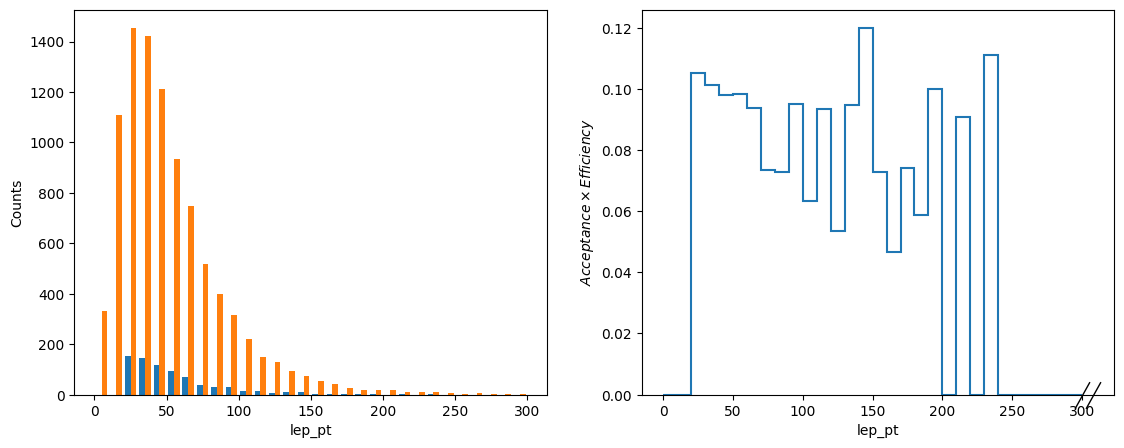

1 lep_eta gen_lep_eta;1


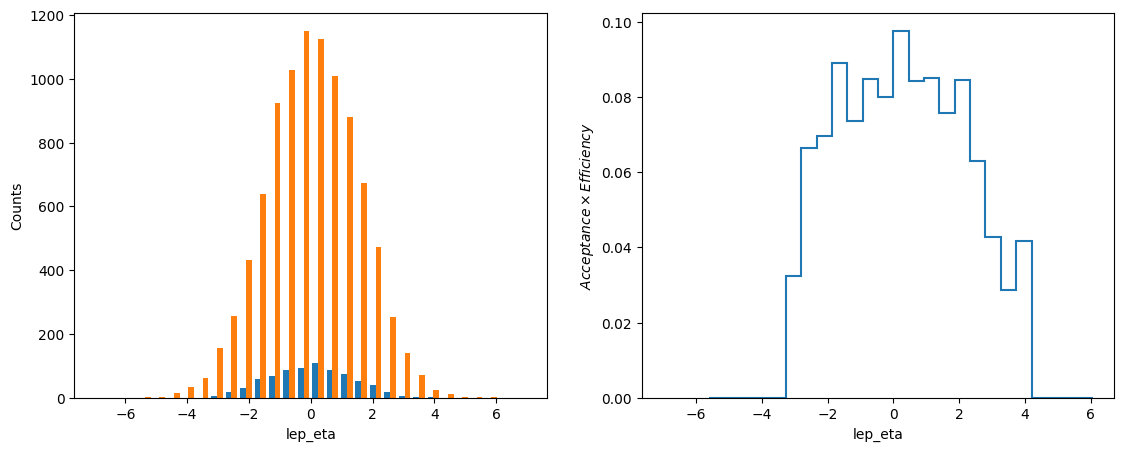

2 lep_phi gen_lep_phi;1


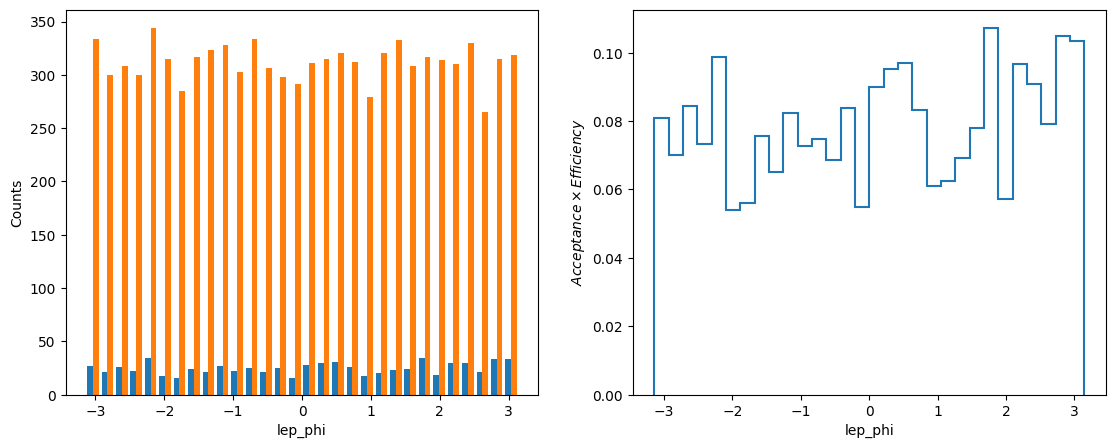

3 alep_pt gen_alep_pt;1


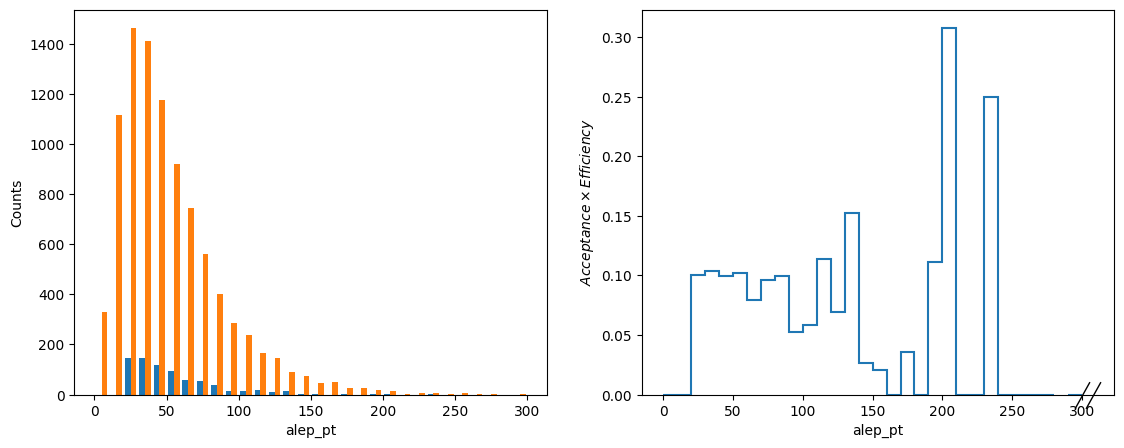

4 alep_eta gen_alep_eta;1


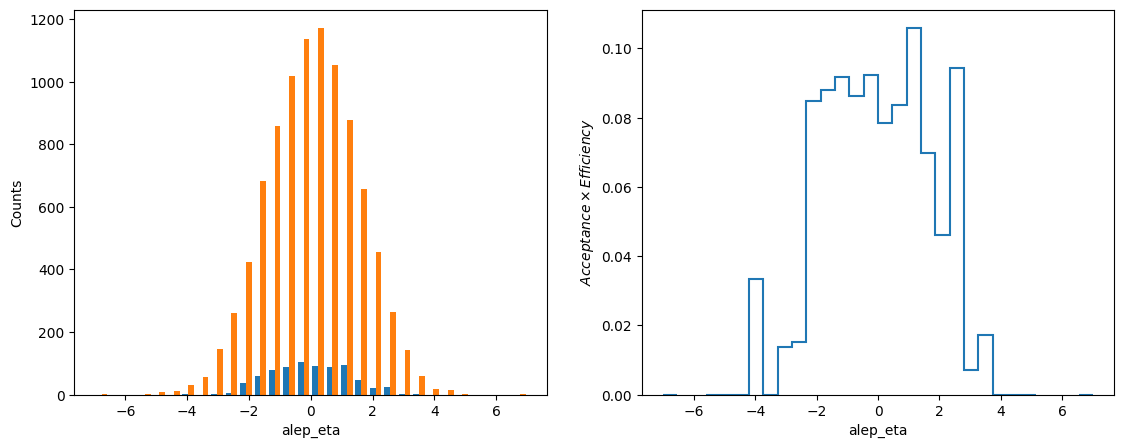

5 alep_phi gen_alep_phi;1


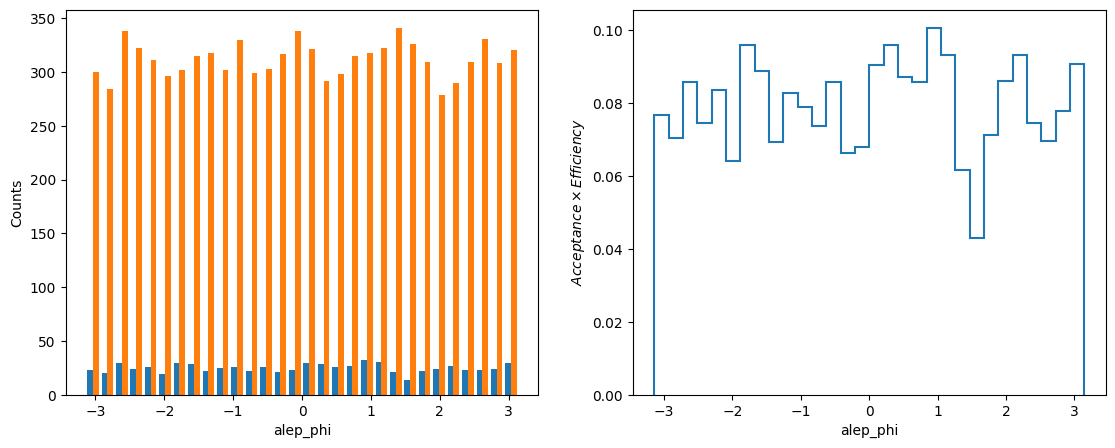

6 met_pt gen_met_pt;1


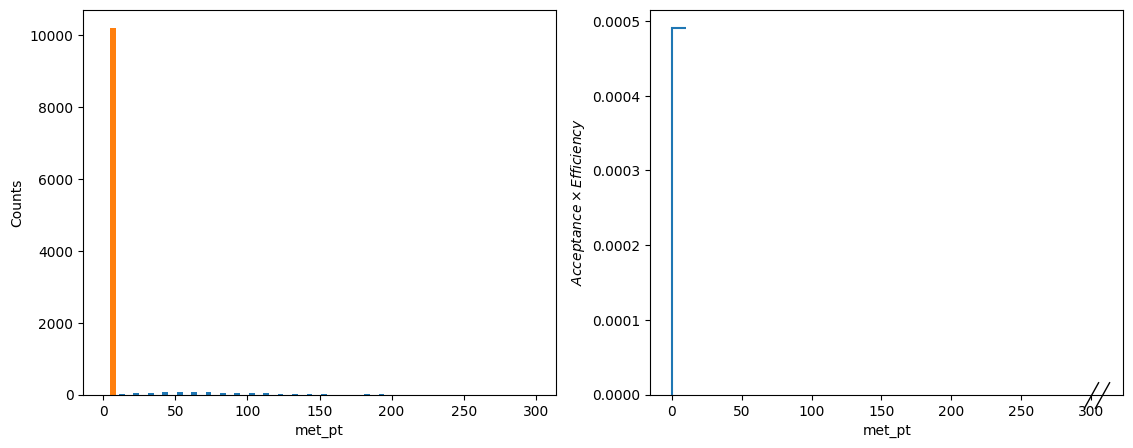

7 met_phi gen_met_phi;1


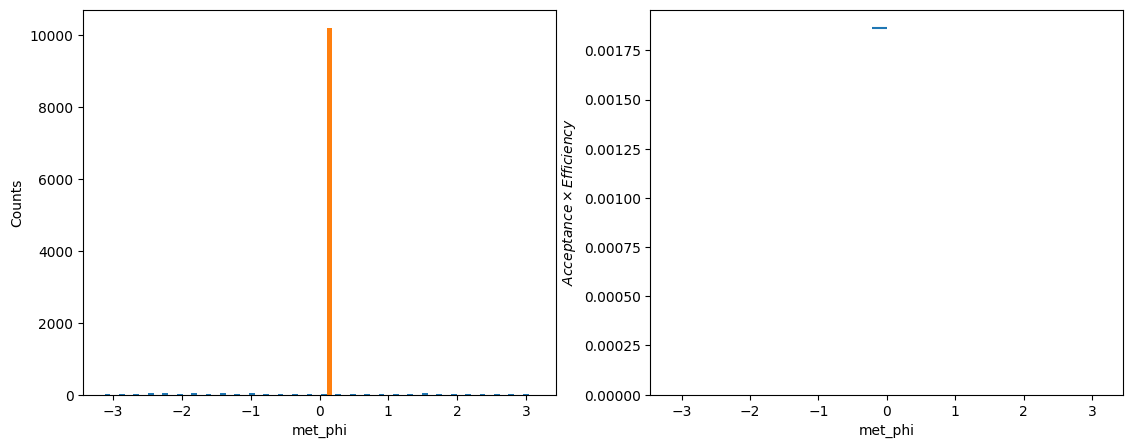

8 b_pt gen_b_pt;1


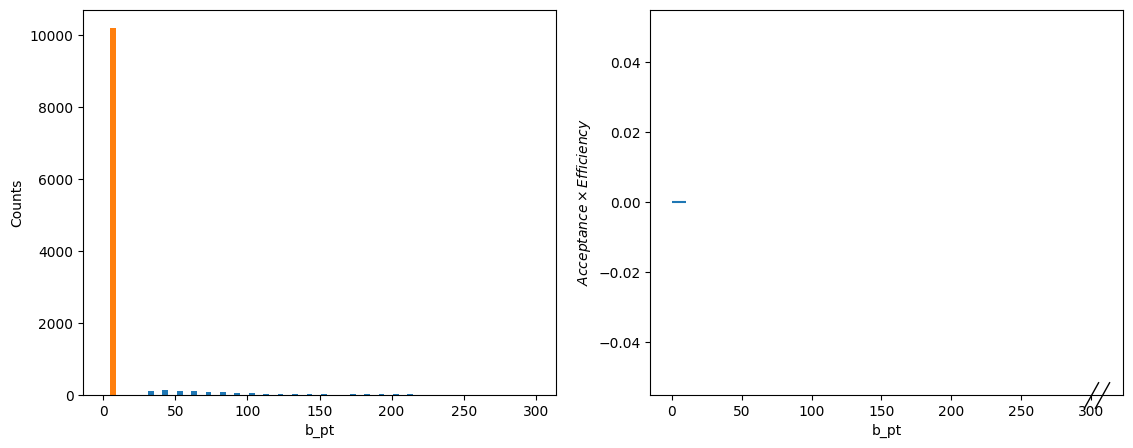

9 b_eta gen_b_eta;1


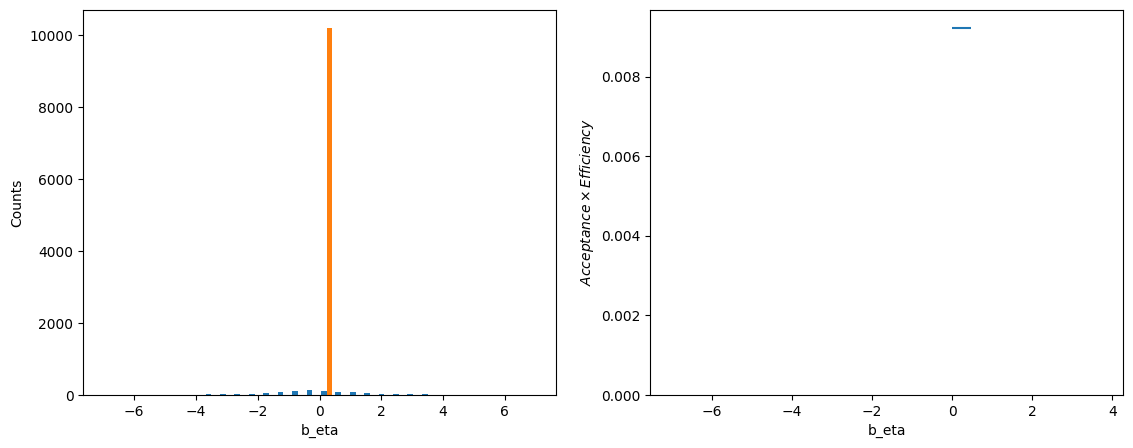

10 b_phi gen_b_phi;1


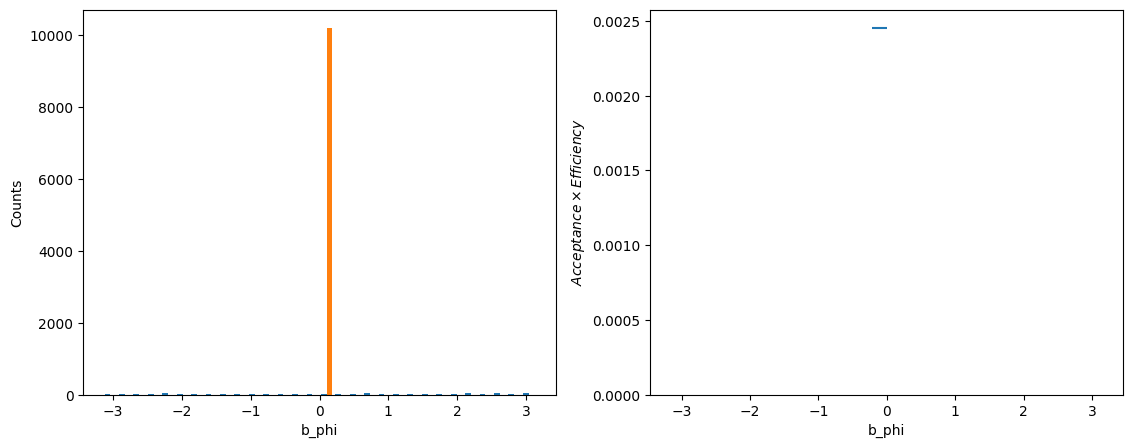

11 ab_pt gen_ab_pt;1


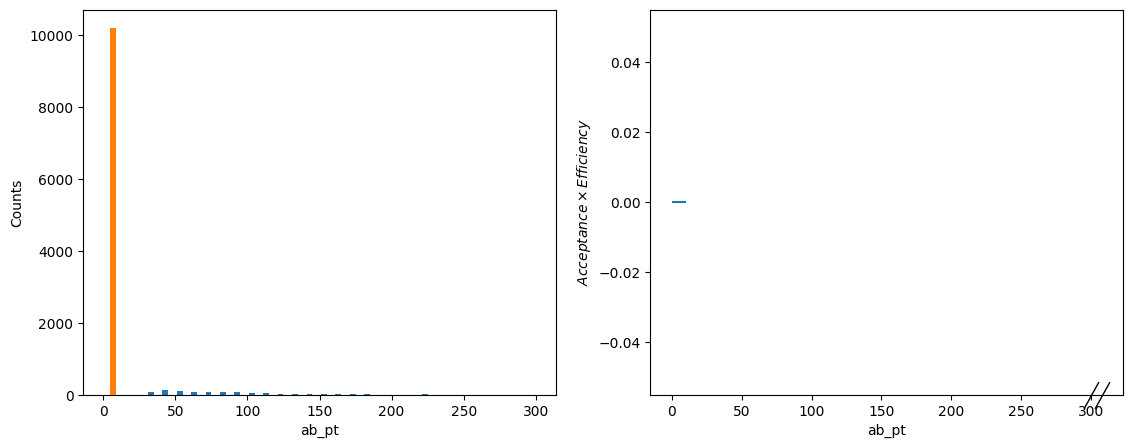

12 ab_eta gen_ab_eta;1


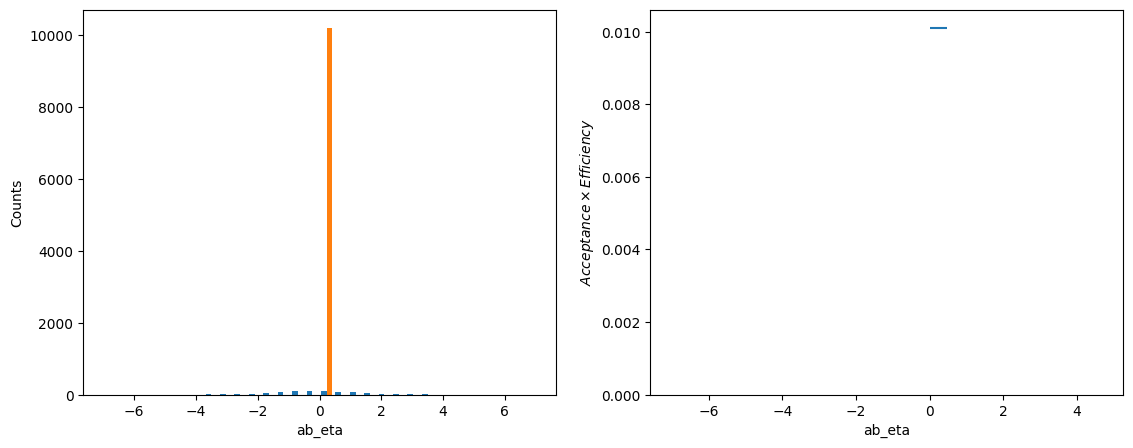

13 ab_phi gen_ab_phi;1


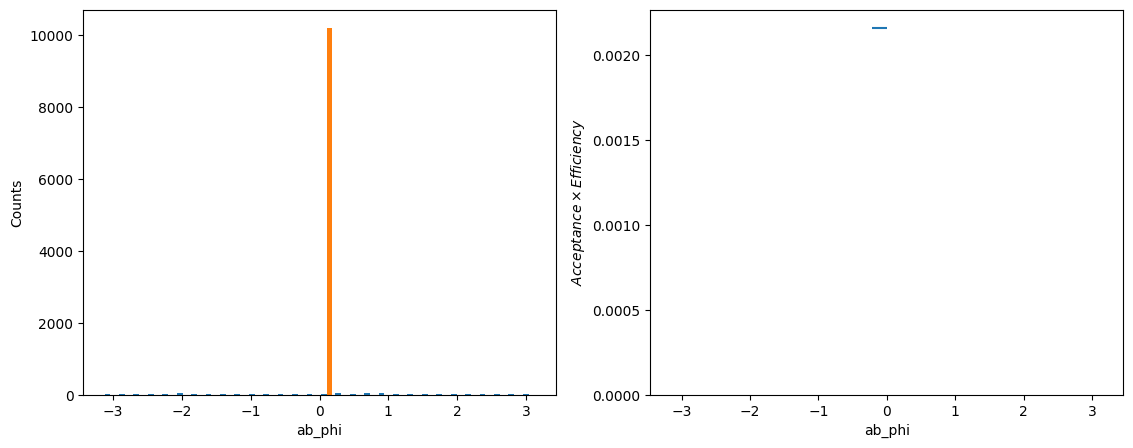

14 neu_pt gen_neu_pt;1


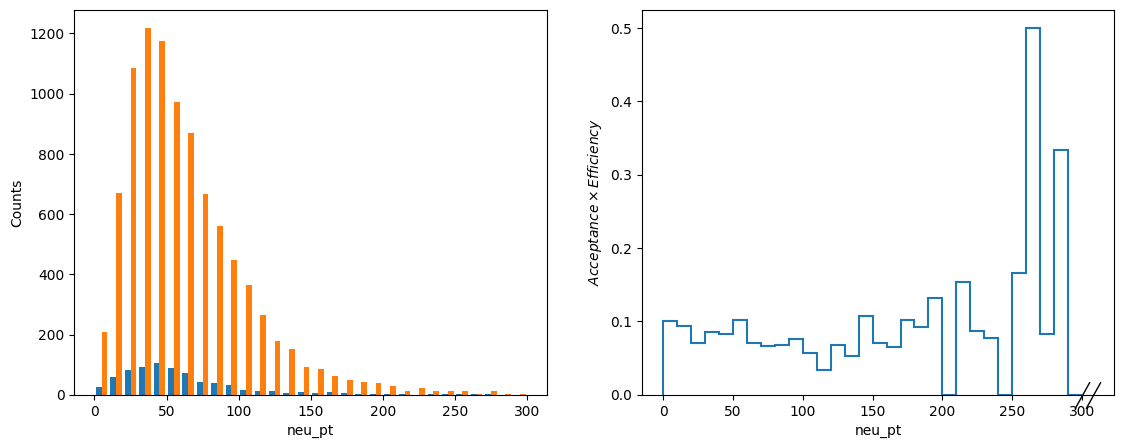

15 neu_eta gen_neu_eta;1


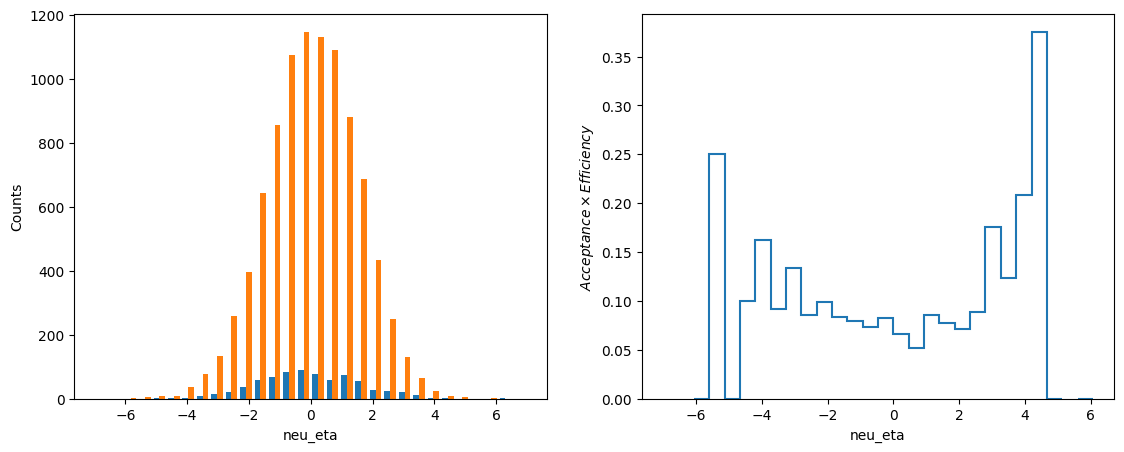

16 neu_phi gen_neu_phi;1


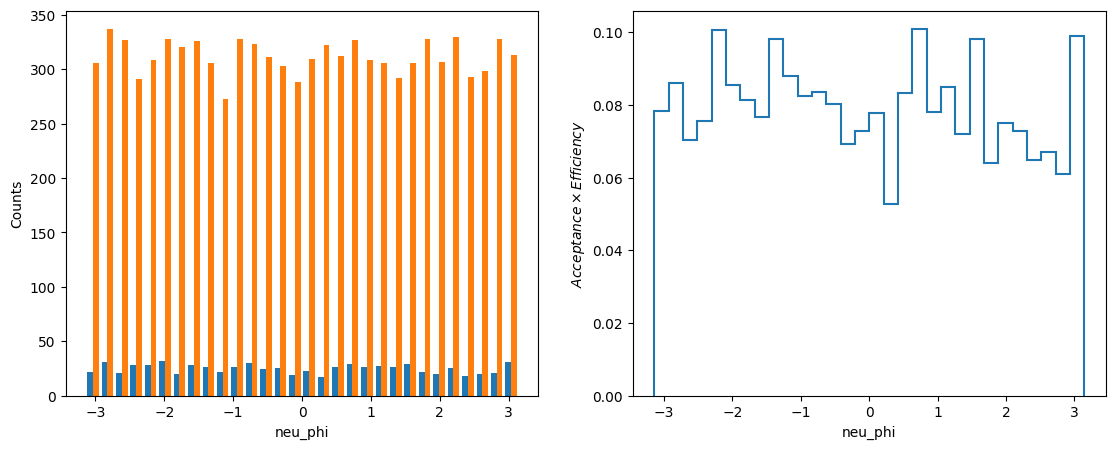

17 aneu_pt gen_aneu_pt;1


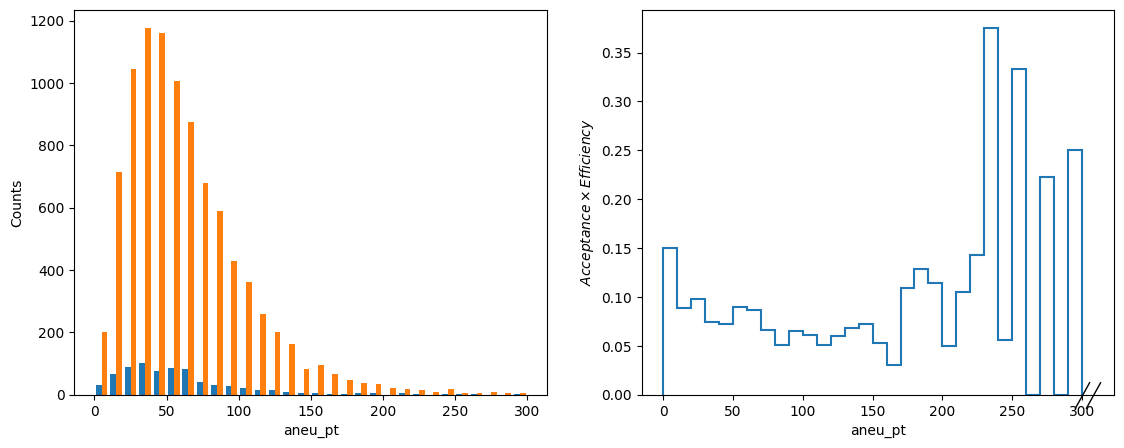

18 aneu_eta gen_aneu_eta;1


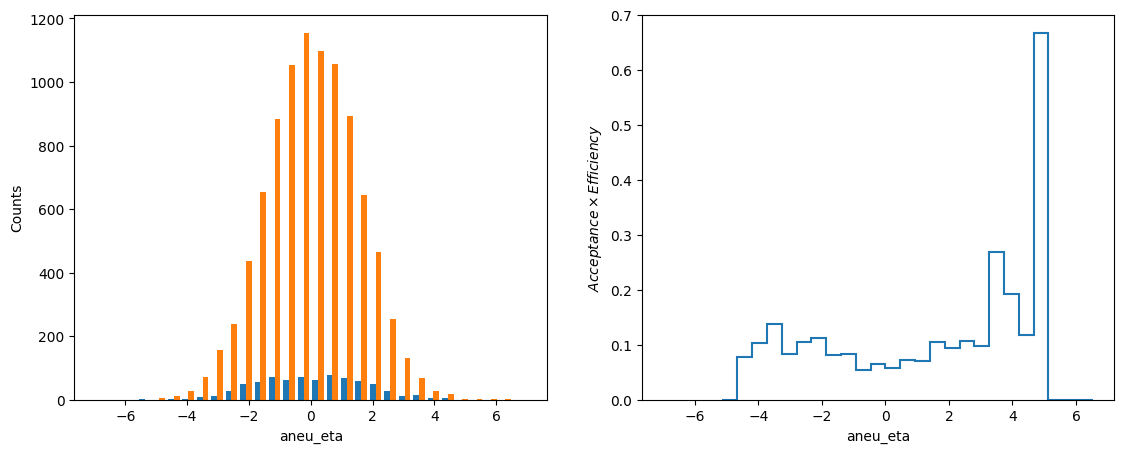

19 aneu_phi gen_aneu_phi;1


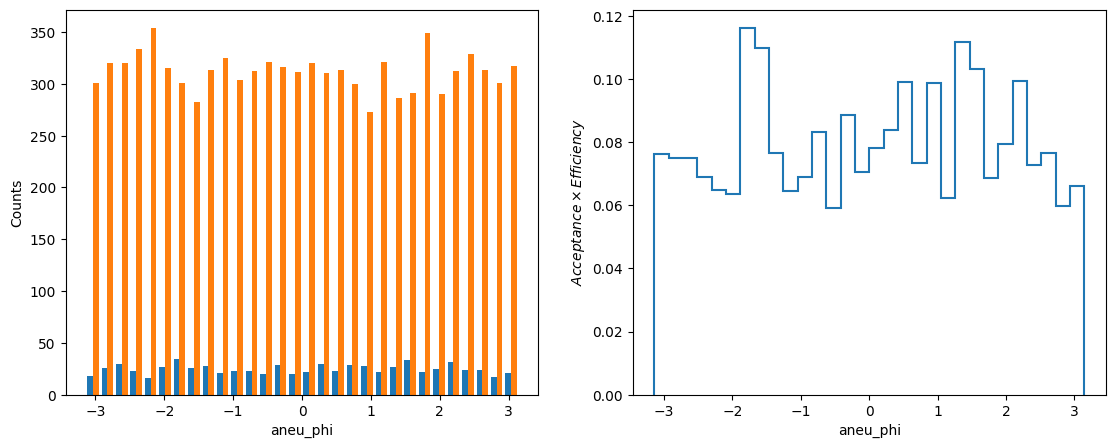

20 top_pt gen_top_pt;1


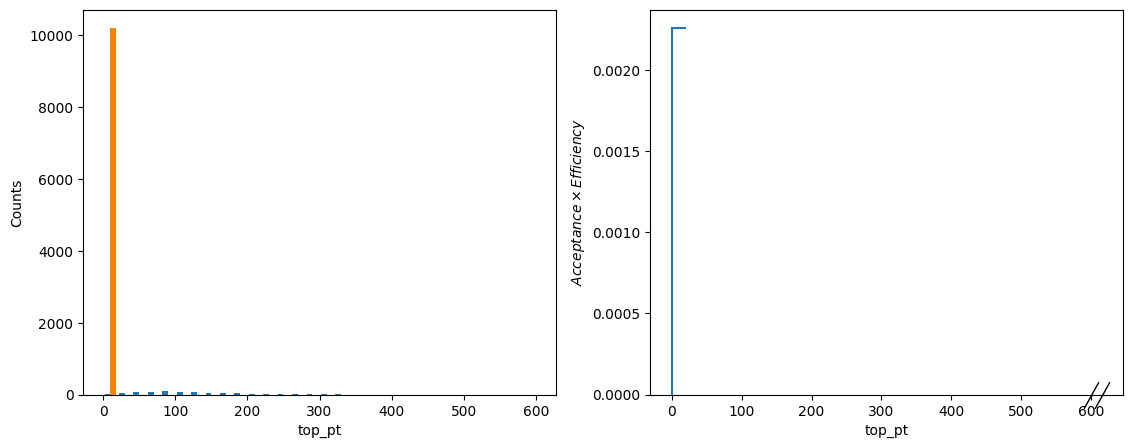

21 top_eta gen_top_eta;1


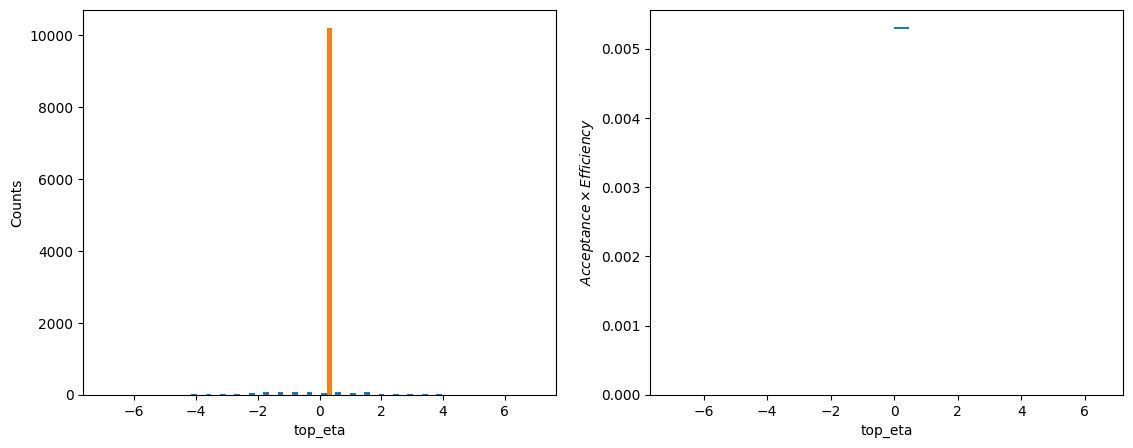

22 top_phi gen_top_phi;1


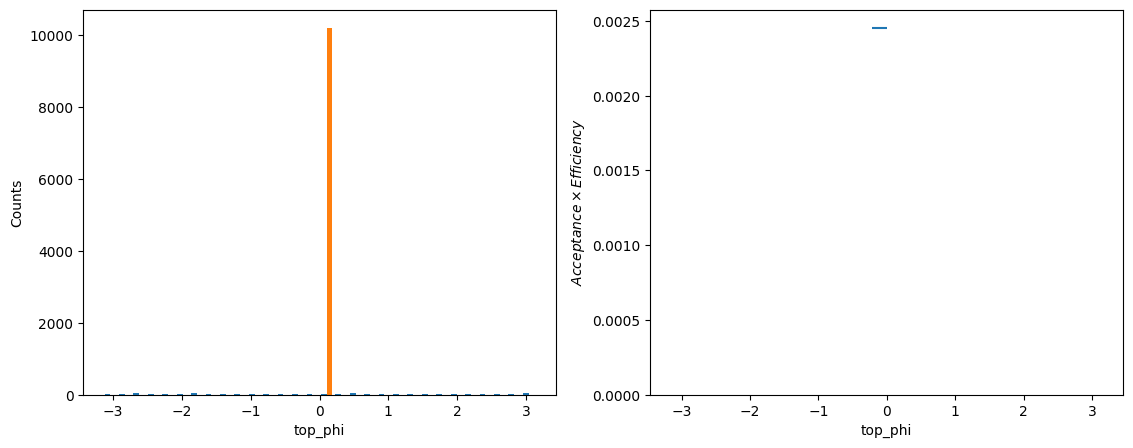

24 atop_pt gen_atop_pt;1


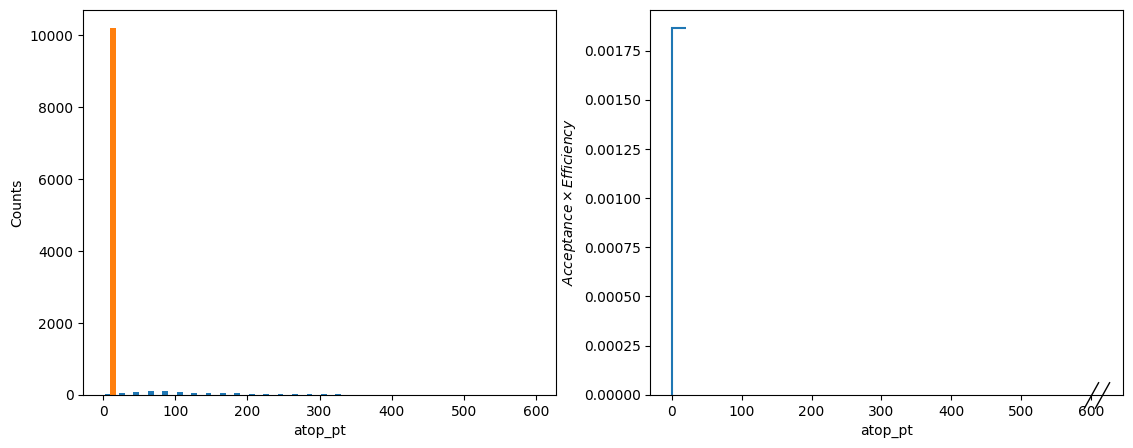

25 atop_eta gen_atop_eta;1


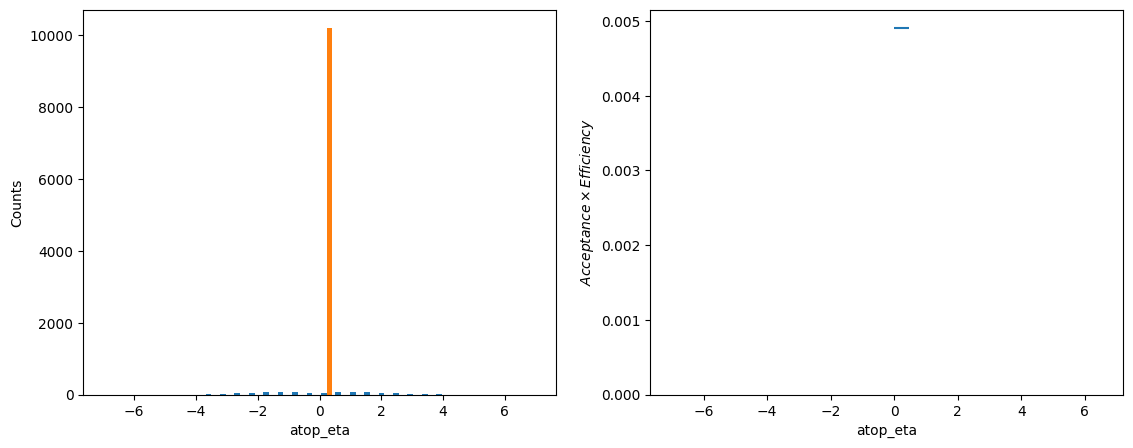

In [28]:
for i in range(len(hist_out.keys(filter_name="/all/"))):
    if (reco_names[i]!='top_rap'):
        print(i, reco_names[i], gen_names[i])
        h_reco_arr = minitree['Step8'][reco_names[i]].array()
        h_gen_arr = minitree['Step0'][gen_names[i].strip(";1")+"_0"].array()
        h_reco = hist_out[reco_names[i]].to_hist()
        h_gen = hist_out['all_gen_'+reco_names[i]].to_hist()
        bins = hist_out[reco_names[i]].to_numpy()[1]
        fig_rvg, (ax_rvg, ax_ratio) = plt.subplots(1, 2, figsize=(8, 5))
        
        #ax_rvg.hist(h_gen)
        (h_reco/h_gen).plot()
        plt.subplots_adjust(right=2.8, left=1.5)
        
        ax_rvg.hist([h_reco_arr, h_gen_arr], bins, label=[reco_names[i], "Counts"])
        ax_rvg.set_xlabel(reco_names[i])
        ax_rvg.set_ylabel("Counts")
        #ax_ratio.hist(hist_out[reco_names[i]].to_hist()/hist_out['all_gen_'+reco_names[i]].to_hist())
        ax_ratio.set_xlabel(reco_names[i])
        ax_ratio.set_ylabel(r"$Acceptance \times Efficiency$")
        #plt.yticks(np.arange(min(bins), max(bins), 100))
        plt.show()